# EDA

# The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the data

In [2]:
!pip install -q openpyxl

In [3]:
df= pd.read_excel('/data/notebook_files/Supplemental_PostSurvey_Data.xlsx')
df_2 = df.copy()

# EDA

Now let's take a look at the data and have some key visualizations according to the features

In [4]:
df.head(4)

,Unnamed: 0,StartDate,EndDate,Q4_Area,Q4_Area_Other,Q5_Year,Q5_Year_Other,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,...,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer,Q17_Comments
0,2,10/29/2021 8:22,10/29/2021 8:25,Business,NaN,Junior,NaN,Male,Caucasian,51-100,...,Agree,Agree,Strongly agree,Disagree,Agree,Agree,I will use it less often than during this assi...,I will use it less often than during this assi...,I will use it about the same amount as during ...,NaN
1,3,10/29/2021 8:22,10/29/2021 8:25,Business,NaN,Sophomore,NaN,Female,Caucasian,51-100,...,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Agree,I will use it about the same amount as during ...,I will use it about the same amount as during ...,I will use it about the same amount as during ...,NaN
2,4,10/29/2021 8:22,10/29/2021 8:26,Business,NaN,Junior,NaN,Female,Caucasian,51-100,...,Strongly agree,Agree,Agree,Strongly agree,Disagree,Agree,I will use it less often than during this assi...,I will use it about the same amount as during ...,I will use it less often than during this assi...,NaN
3,5,10/29/2021 8:22,10/29/2021 8:26,Arts & Sciences,Bio Chem,Junior,NaN,Male,Caucasian,26-50,...,Agree,Agree,Agree,Agree,Agree,Agree,I will use it less often than during this assi...,I will use it about the same amount as during ...,I will use it more often than during this assi...,LinkedIn seems like it would be very helpful w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  73 non-null     int64 
 1   StartDate                   73 non-null     object
 2   EndDate                     73 non-null     object
 3   Q4_Area                     73 non-null     object
 4   Q4_Area_Other               7 non-null      object
 5   Q5_Year                     73 non-null     object
 6   Q5_Year_Other               4 non-null      object
 7   Q6_Gender                   73 non-null     object
 8   Q7_Ethnicity                73 non-null     object
 9   Q12_LinkedIn_Connect        73 non-null     object
 10  Q15_LinkedIn_Features       73 non-null     object
 11  Q19_LinkedIn_TaskManage     72 non-null     object
 12  Q19_LinkedIn_TaskIntro      72 non-null     object
 13  Q19_LinkedIn_TaskProf       72 non-null     object
 

Even though it is a short dataset (73 entries), it will help us make useful analysis for:

1.Usage patterns

2.Students’ profiles

3.Latent dimentions ( )

In [6]:
#Lets see how many student are in terms of the year they are coursing
df['Q5_Year'].value_counts()

Q5_Year
Junior 23
Senior 20
Sophomore 19
Freshman 11
Name: count, dtype: int64

In [7]:
#See the variety of ethnicity withinh the group of students
df['Q7_Ethnicity'].unique()

array(['Caucasian', 'Asian American', 'Hispanic/Latino', 'Other',
 'Mixed race', 'African American'], dtype=object)

In [8]:
# Now lets visualize the frequency and importance of words in the Q17_Comments feature

In [9]:
!pip install -q wordcloud

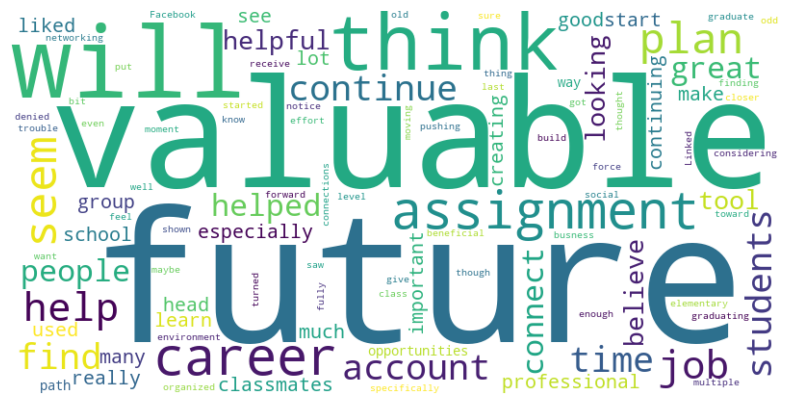

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 1. Combine all comments into one large string, ignoring null values
text = " ".join(comment for comment in df.Q17_Comments.dropna())

# 2. This prevents generic words from dominating the cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["LinkedIn", "use", "student", "using"])

# 3. Create and generate the word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    max_words=100,
    colormap='viridis' 
).generate(text)

# 4. Display the generated image
wordcloud_image = wordcloud.to_image()

fig = plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
fig.savefig('wordcloud_linkedin.png', dpi=150, bbox_inches='tight')
plt.show()

Since future and valuable are the primary anchors words within the comments, they can be interpreted as:

1. ***Valuable*** indicates an ***Investment Mindset***, LinkedIn is not seen as a fun social media for the students; they see it as a **utility**, they are investing their time looking for high-quality content or high_impact connections rather than entertainment.
   
2. ***Future*** indicates an ***Aspiration Mindset***; students are looking for what they will become, not necessarily what they are now, they are likely building their profiles in anticipation of job hunting or internships.

Now let's validate this interpretation with other features, for valuable we will check 'Q18_LinkedIn_Professional' and for future 'Q24_LinkedIn_FreqCareer'

In [11]:
df['Q18_LinkedIn_Professional'].value_counts()

Q18_LinkedIn_Professional
Very likely 37
Likely 33
Neither likely nor unlikely 2
Unlikely 1
Name: count, dtype: int64

96% of the students find LinkedIn a valuable tool for professionalism due to the high scores for "very likely" and "Likely"

In [12]:
df['Q24_LinkedIn_FreqCareer'].value_counts()

Q24_LinkedIn_FreqCareer
I will use it more often than during this assignment 35
I will use it about the same amount as during this assignment 21
I will use it less often than during this assignment 16
I won't use it at all 1
Name: count, dtype: int64

77% of the students will use LinkedIn more often or at least the same time after took the course, it could indicates that they will seek for jobs and they are anticipating for what will be their future status in the workforce environment.

# ***Insight:*** Students recognize the value of LinkedIn but are focused on the long-term.

# feature_engineering_and_data_preparation

# Feature Engineering and Data Preparation

***Missing Values***

Lets see if we have missing values

In [13]:
df.isnull().sum()

Unnamed: 0 0
StartDate 0
EndDate 0
Q4_Area 0
Q4_Area_Other 66
Q5_Year 0
Q5_Year_Other 69
Q6_Gender 0
Q7_Ethnicity 0
Q12_LinkedIn_Connect 0
Q15_LinkedIn_Features 0
Q19_LinkedIn_TaskManage 1
Q19_LinkedIn_TaskIntro 1
Q19_LinkedIn_TaskProf 1
Q19_LinkedIn_TaskIntern 1
Q19_LinkedIn_TaskJob 1
Q19_LinkedIn_TaskInsight 1
Q19_LinkedIn_TaskCompany 1
Q17_LinkedIn_Industry 0
Q17_LinkedIn_Instructors 0
Q17_LinkedIn_Classmates 1
Q17_LinkedIn_Career 0
Q17_LinkedIn_Exposure 1
Q17_LinkedIn_Expression 1
Q17_LinkedIn_Dissemination 1
Q18_LinkedIn_Interact 0
Q18_LinkedIn_Entertained 0
Q18_LinkedIn_Informed 0
Q18_LinkedIn_Career 0
Q18_LinkedIn_Professional 0
Q20_LinkedIn_UseProf 0
Q20_LinkedIn_UseJob 0
Q20_LinkedIn_UseCareer 0
Q20_LinkedIn_UseNetwork 1
Q20_LinkedIn_UseContacts 0
Q20_LinkedIn_UseValue 0
Q22_LinkedIn_FreqYear 0
Q23_LinkedIn_FreqSenior 0
Q24_LinkedIn_FreqCareer 0
Q17_Comments 50
dtype: int64

In [14]:
#We Will drop the columns Unnamed: 0, StartDate, EndDate, Q17_Comments and Q15_LinkedIn_Features as we dont need them for the clustering process
df = df.drop(['Unnamed: 0', 'StartDate', 'EndDate', 'Q17_Comments', 'Q15_LinkedIn_Features', ], axis=1)

In [15]:
#Now lets see the percentage of missing data per feature
(100 * df.isnull().sum() / len(df)).round(2)

Q4_Area 0.00
Q4_Area_Other 90.41
Q5_Year 0.00
Q5_Year_Other 94.52
Q6_Gender 0.00
Q7_Ethnicity 0.00
Q12_LinkedIn_Connect 0.00
Q19_LinkedIn_TaskManage 1.37
Q19_LinkedIn_TaskIntro 1.37
Q19_LinkedIn_TaskProf 1.37
Q19_LinkedIn_TaskIntern 1.37
Q19_LinkedIn_TaskJob 1.37
Q19_LinkedIn_TaskInsight 1.37
Q19_LinkedIn_TaskCompany 1.37
Q17_LinkedIn_Industry 0.00
Q17_LinkedIn_Instructors 0.00
Q17_LinkedIn_Classmates 1.37
Q17_LinkedIn_Career 0.00
Q17_LinkedIn_Exposure 1.37
Q17_LinkedIn_Expression 1.37
Q17_LinkedIn_Dissemination 1.37
Q18_LinkedIn_Interact 0.00
Q18_LinkedIn_Entertained 0.00
Q18_LinkedIn_Informed 0.00
Q18_LinkedIn_Career 0.00
Q18_LinkedIn_Professional 0.00
Q20_LinkedIn_UseProf 0.00
Q20_LinkedIn_UseJob 0.00
Q20_LinkedIn_UseCareer 0.00
Q20_LinkedIn_UseNetwork 1.37
Q20_LinkedIn_UseContacts 0.00
Q20_LinkedIn_UseValue 0.00
Q22_LinkedIn_FreqYear 0.00
Q23_LinkedIn_FreqSenior 0.00
Q24_LinkedIn_FreqCareer 0.00
dtype: float64

In [16]:
#Now lets calculate the percentage of missing values for each features
def percent_missing(dataframe):
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

In [17]:
percent_nan = percent_missing(df)

In [18]:
percent_nan

Q19_LinkedIn_TaskIntro 1.369863
Q19_LinkedIn_TaskManage 1.369863
Q19_LinkedIn_TaskIntern 1.369863
Q19_LinkedIn_TaskProf 1.369863
Q19_LinkedIn_TaskJob 1.369863
Q19_LinkedIn_TaskInsight 1.369863
Q17_LinkedIn_Classmates 1.369863
Q19_LinkedIn_TaskCompany 1.369863
Q17_LinkedIn_Dissemination 1.369863
Q20_LinkedIn_UseNetwork 1.369863
Q17_LinkedIn_Exposure 1.369863
Q17_LinkedIn_Expression 1.369863
Q4_Area_Other 90.410959
Q5_Year_Other 94.520548
dtype: float64

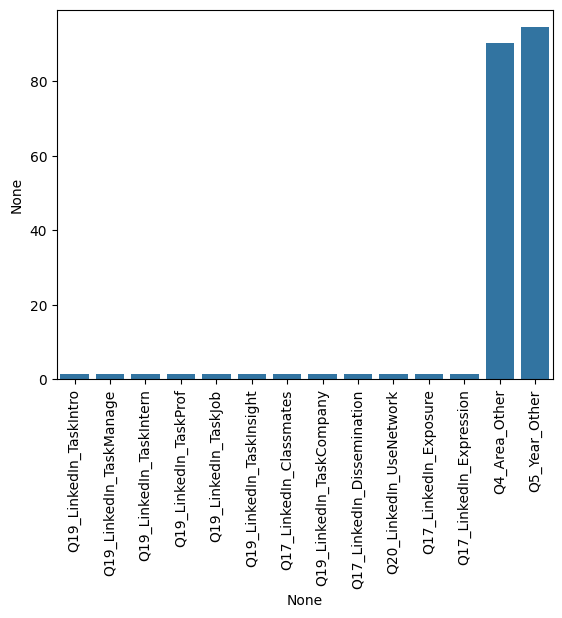

In [19]:
#Now here we got the visualization of the perncentange on missing values per feature
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);

In [20]:
#Which rows has that little percent (below 1%) to drop them
percent_nan[percent_nan < 1]

#NO ONE

Series([], dtype: float64)

In [21]:
#Lets eliminate the features Q4_Area_Other and Q5_Year_Other due to the high percentage of missing values
df = df.drop(['Q4_Area_Other', 'Q5_Year_Other'], axis=1)

In [22]:
percent_nan = percent_missing(df)

(0.0, 2.0)

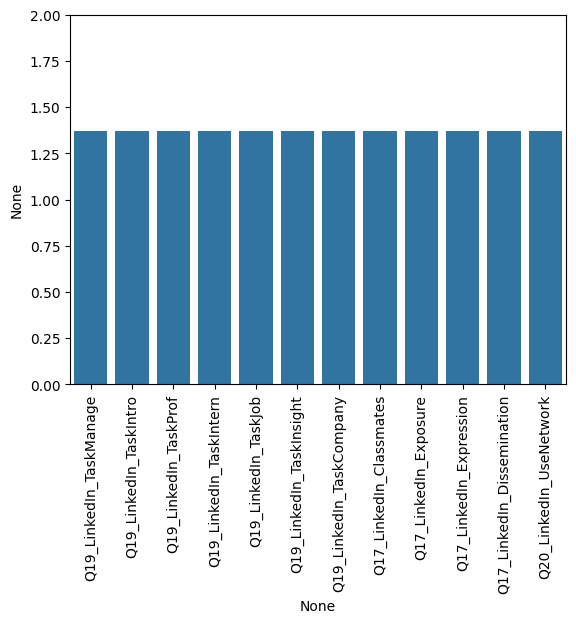

In [23]:
#Now lets see the ones that have a percentage of missing values equal or higer than 1%
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);
plt.ylim(0,2)

In [24]:
#Now! The rows where missing valuea are present are shown
df[df.isna().any(axis=1)]
#They are just 4 rows

,Q4_Area,Q5_Year,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,Q19_LinkedIn_TaskManage,Q19_LinkedIn_TaskIntro,Q19_LinkedIn_TaskProf,Q19_LinkedIn_TaskIntern,Q19_LinkedIn_TaskJob,...,Q18_LinkedIn_Professional,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer
24,Arts & Sciences,Junior,Female,Caucasian,26-50,Very unimportant,Very unimportant,Very unimportant,Very unimportant,Very unimportant,...,Very likely,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I will use it more often than during this assi...,I will use it more often than during this assi...,I will use it more often than during this assi...
25,Business,Junior,Female,Caucasian,51-100,Very unimportant,Very unimportant,Very unimportant,Very unimportant,Very unimportant,...,Likely,Agree,Agree,Agree,Strongly agree,Strongly agree,Strongly agree,I will use it about the same amount as during ...,I will use it more often than during this assi...,I will use it more often than during this assi...
32,Business,Freshman,Male,Caucasian,101-500,NaN,NaN,NaN,NaN,NaN,...,Very likely,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,I will use it more often than during this assi...,I will use it more often than during this assi...,I will use it more often than during this assi...
60,Arts & Sciences,Sophomore,Male,Mixed race,101-500,Important,Important,Important,Important,Important,...,Likely,Strongly agree,Strongly agree,Agree,NaN,Agree,Strongly agree,I will use it about the same amount as during ...,I will use it about the same amount as during ...,I will use it more often than during this assi...


In [25]:
#We are going to eliminate them althoug we have a small dataset
df.dropna(inplace=True)

In [26]:
percent_nan = percent_missing(df)

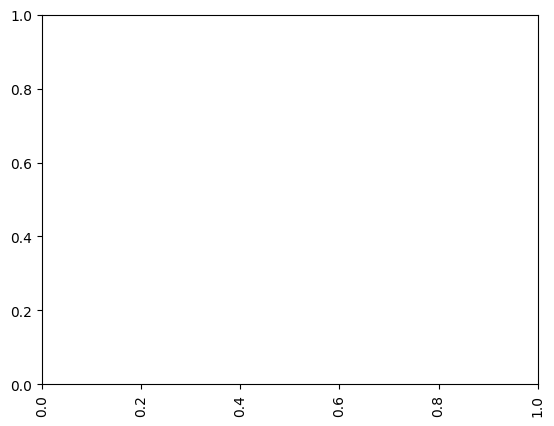

In [27]:
#Now lets see if there is any missing value
sns.barplot(x=percent_nan.index, y=percent_nan);
plt.xticks(rotation = 90);
#There's no missing values

In [28]:
df.isnull().sum()

Q4_Area 0
Q5_Year 0
Q6_Gender 0
Q7_Ethnicity 0
Q12_LinkedIn_Connect 0
Q19_LinkedIn_TaskManage 0
Q19_LinkedIn_TaskIntro 0
Q19_LinkedIn_TaskProf 0
Q19_LinkedIn_TaskIntern 0
Q19_LinkedIn_TaskJob 0
Q19_LinkedIn_TaskInsight 0
Q19_LinkedIn_TaskCompany 0
Q17_LinkedIn_Industry 0
Q17_LinkedIn_Instructors 0
Q17_LinkedIn_Classmates 0
Q17_LinkedIn_Career 0
Q17_LinkedIn_Exposure 0
Q17_LinkedIn_Expression 0
Q17_LinkedIn_Dissemination 0
Q18_LinkedIn_Interact 0
Q18_LinkedIn_Entertained 0
Q18_LinkedIn_Informed 0
Q18_LinkedIn_Career 0
Q18_LinkedIn_Professional 0
Q20_LinkedIn_UseProf 0
Q20_LinkedIn_UseJob 0
Q20_LinkedIn_UseCareer 0
Q20_LinkedIn_UseNetwork 0
Q20_LinkedIn_UseContacts 0
Q20_LinkedIn_UseValue 0
Q22_LinkedIn_FreqYear 0
Q23_LinkedIn_FreqSenior 0
Q24_LinkedIn_FreqCareer 0
dtype: int64

# Categorical Features

Since all the features of our dataframe are categorical, we need to convert the classes to numeric for the clustering algorithm, depending whether they are nominal or ordinal

Let’s explore the classes or entries we have in each feature

In [29]:
for c in df.columns:
    # Obtain the unique values for each column avoiding NaN Values
    unique_values = df[c].dropna().unique()

    # Print the name of the column and the classes each has
    print(f"Column: {c[:25]:<25} | Únique: {unique_values}")

Column: Q4_Area                   | Únique: ['Business' 'Arts & Sciences' 'Health Professions' 'Undecided (Exploring)']
Column: Q5_Year                   | Únique: ['Junior' 'Sophomore' 'Senior' 'Freshman']
Column: Q6_Gender                 | Únique: ['Male' 'Female' 'Prefer not to say']
Column: Q7_Ethnicity              | Únique: ['Caucasian' 'Asian American' 'Hispanic/Latino' 'Other' 'Mixed race'
 'African American']
Column: Q12_LinkedIn_Connect      | Únique: ['51-100' '26-50' '101-500' '0-25']
Column: Q19_LinkedIn_TaskManage   | Únique: ['Important' 'Neither important nor unimportant' 'Very important'
 'Very unimportant' 'Unimportant']
Column: Q19_LinkedIn_TaskIntro    | Únique: ['Very important' 'Unimportant' 'Important'
 'Neither important nor unimportant']
Column: Q19_LinkedIn_TaskProf     | Únique: ['Very important' 'Very unimportant' 'Important'
 'Neither important nor unimportant']
Column: Q19_LinkedIn_TaskIntern   | Únique: ['Very important' 'Unimportant' 'Neither important 

In [30]:
#For covinience we convert all the strings in the fuature classes to lowercase
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [31]:
#Done
for c in df.columns:
    # Here we get the unique values per feature avoiding missing values
    unique_values = df[c].dropna().unique()

    # Printing the name of the columns in an organized manner
    print(f"Column: {c[:25]:<25} | Únique: {unique_values}")

Column: Q4_Area                   | Únique: ['business' 'arts & sciences' 'health professions' 'undecided (exploring)']
Column: Q5_Year                   | Únique: ['junior' 'sophomore' 'senior' 'freshman']
Column: Q6_Gender                 | Únique: ['male' 'female' 'prefer not to say']
Column: Q7_Ethnicity              | Únique: ['caucasian' 'asian american' 'hispanic/latino' 'other' 'mixed race'
 'african american']
Column: Q12_LinkedIn_Connect      | Únique: ['51-100' '26-50' '101-500' '0-25']
Column: Q19_LinkedIn_TaskManage   | Únique: ['important' 'neither important nor unimportant' 'very important'
 'very unimportant' 'unimportant']
Column: Q19_LinkedIn_TaskIntro    | Únique: ['very important' 'unimportant' 'important'
 'neither important nor unimportant']
Column: Q19_LinkedIn_TaskProf     | Únique: ['very important' 'very unimportant' 'important'
 'neither important nor unimportant']
Column: Q19_LinkedIn_TaskIntern   | Únique: ['very important' 'unimportant' 'neither important 

***Dealing with all the ordinal features***

Using a master dictionary, we can define, map and replace the strings for the ordinal variables according to a scale

In [32]:
pd.set_option('future.no_silent_downcasting', True)
# 1. A Master Map Dictionary
all_scales = {
    # Importance Scale 
    'very unimportant': 1, 'unimportant': 2, 'neither important nor unimportant': 3,
    'important': 4, 'very important': 5,

    # Agreement Scale 
    'strongly disagree': 1, 'disagree': 2, 'neither agree nor disagree': 3,
    'agree': 4, 'strongly agree': 5,

    # Likelihood Scale 
    'very unlikely': 1, 'unlikely': 2, 'neither likely nor unlikely': 3,
    'likely': 4, 'very likely': 5,

    # Usage Frequency Scale
    "i won't use it at all": 1,
    'i will use it less often than during this assignment': 2,
    'i will use it about the same amount as during this assignment': 3,
    'i will use it more often than during this assignment': 4,

    # LinkedIn Connect / Quantity Range
    '0-25': 1,
    '26-50': 2,
    '51-100': 3,
    '101-500': 4
}

# 2. Identify all survey columns 
keywords = 'important|agree|likely|use it|0-25'
survey_cols = [col for col in df.columns if df[col].astype(str).str.contains(keywords, case=False).any()]

# 3. Loop through and apply the combined mapping using .replace()
for col in survey_cols:
    # A. Here we clean the text (lowercase and remove extra spaces)
    df[col] = df[col].astype(str).str.strip().str.lower()

    # B. Filter the master dictionary to only include keys present in this column
    # This prevents mapping unrelated values to NaN
    valid_keys = df[col].unique()
    current_col_map = {k: v for k, v in all_scales.items() if k in valid_keys}

    # C. Use .replace() to substitute text with numbers while keeping unrelated data intact
    if current_col_map:
        df[col] = df[col].replace(current_col_map)

# 4. Convert columns to numeric (handle any remaining 'NaN' strings or other non-numeric data)
for col in survey_cols:
    # 'errors="coerce"' turns anything that can't be a number into an actual Pandas NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [33]:
#Let's see if it worked!
df

,Q4_Area,Q5_Year,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,Q19_LinkedIn_TaskManage,Q19_LinkedIn_TaskIntro,Q19_LinkedIn_TaskProf,Q19_LinkedIn_TaskIntern,Q19_LinkedIn_TaskJob,...,Q18_LinkedIn_Professional,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer
0,business,junior,male,caucasian,3,4,5,5,5,4,...,4,4,4,5,2,4,4,2,2,3
1,business,sophomore,female,caucasian,3,3,2,1,2,2,...,5,3,3,4,4,3,4,3,3,3
2,business,junior,female,caucasian,3,5,4,5,5,2,...,4,5,4,4,5,2,4,2,3,2
3,arts & sciences,junior,male,caucasian,2,4,4,4,3,3,...,4,4,4,4,4,4,4,2,3,4
4,business,junior,male,caucasian,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,business,freshman,female,caucasian,3,4,4,5,4,4,...,4,3,3,3,4,4,4,2,3,2
69,health professions,sophomore,female,caucasian,2,4,4,5,4,3,...,4,4,4,4,4,4,5,2,4,4
70,health professions,junior,male,caucasian,3,5,5,4,4,4,...,4,5,4,4,5,4,4,3,3,3
71,arts & sciences,senior,male,caucasian,1,3,2,3,2,5,...,4,3,3,3,4,3,3,3,3,3


*Dealing with the nominal features*

In [34]:
df = pd.get_dummies(df, columns=['Q4_Area', 'Q5_Year', 'Q6_Gender', 'Q7_Ethnicity'], prefix='is')

In [35]:
df.columns

Index(['Q12_LinkedIn_Connect', 'Q19_LinkedIn_TaskManage',
       'Q19_LinkedIn_TaskIntro', 'Q19_LinkedIn_TaskProf',
       'Q19_LinkedIn_TaskIntern', 'Q19_LinkedIn_TaskJob',
       'Q19_LinkedIn_TaskInsight', 'Q19_LinkedIn_TaskCompany',
       'Q17_LinkedIn_Industry', 'Q17_LinkedIn_Instructors',
       'Q17_LinkedIn_Classmates', 'Q17_LinkedIn_Career',
       'Q17_LinkedIn_Exposure', 'Q17_LinkedIn_Expression',
       'Q17_LinkedIn_Dissemination', 'Q18_LinkedIn_Interact',
       'Q18_LinkedIn_Entertained', 'Q18_LinkedIn_Informed',
       'Q18_LinkedIn_Career', 'Q18_LinkedIn_Professional',
       'Q20_LinkedIn_UseProf', 'Q20_LinkedIn_UseJob', 'Q20_LinkedIn_UseCareer',
       'Q20_LinkedIn_UseNetwork', 'Q20_LinkedIn_UseContacts',
       'Q20_LinkedIn_UseValue', 'Q22_LinkedIn_FreqYear',
       'Q23_LinkedIn_FreqSenior', 'Q24_LinkedIn_FreqCareer',
       'is_arts & sciences', 'is_business', 'is_health professions',
       'is_undecided (exploring)', 'is_freshman', 'is_junior', 'is_senior',
 

Our dataframe is ready for the clustering

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0 to 72
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Q12_LinkedIn_Connect        69 non-null     int64
 1   Q19_LinkedIn_TaskManage     69 non-null     int64
 2   Q19_LinkedIn_TaskIntro      69 non-null     int64
 3   Q19_LinkedIn_TaskProf       69 non-null     int64
 4   Q19_LinkedIn_TaskIntern     69 non-null     int64
 5   Q19_LinkedIn_TaskJob        69 non-null     int64
 6   Q19_LinkedIn_TaskInsight    69 non-null     int64
 7   Q19_LinkedIn_TaskCompany    69 non-null     int64
 8   Q17_LinkedIn_Industry       69 non-null     int64
 9   Q17_LinkedIn_Instructors    69 non-null     int64
 10  Q17_LinkedIn_Classmates     69 non-null     int64
 11  Q17_LinkedIn_Career         69 non-null     int64
 12  Q17_LinkedIn_Exposure       69 non-null     int64
 13  Q17_LinkedIn_Expression     69 non-null     int64
 14  Q17_LinkedIn_Diss

# K_Mean_Clustering_Model

# Let’s use K-Means to build our clustering algorithm 

Since K-Means is based on distance, it's recommended to standardize (scale) the values, also, due to there are 20 features, we are going to apply the principal component method and select the best eight components that explain most the variance of the dataframe.

Since the purpose of this analysis is not to predict a feature but to understand and classify the students, we cannot mix all the features indiscriminately in the same model, for a clustering algorithm based on euclidean distance we need to pick just the numerical ordinal features previously coded.

In [37]:
latent_features = [
    'Q17_LinkedIn_Instructors', 'Q17_LinkedIn_Classmates',
    'Q17_LinkedIn_Career', 'Q17_LinkedIn_Exposure',
    'Q17_LinkedIn_Expression', 'Q17_LinkedIn_Dissemination',
    'Q18_LinkedIn_Interact', 'Q18_LinkedIn_Entertained',
    'Q18_LinkedIn_Informed', 'Q18_LinkedIn_Career',
    'Q18_LinkedIn_Professional',
    'Q20_LinkedIn_UseProf', 'Q20_LinkedIn_UseJob',
    'Q20_LinkedIn_UseCareer', 'Q20_LinkedIn_UseNetwork',
    'Q20_LinkedIn_UseContacts', 'Q20_LinkedIn_UseValue',
    'Q22_LinkedIn_FreqYear', 'Q23_LinkedIn_FreqSenior',
    'Q24_LinkedIn_FreqCareer'
]

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[latent_features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

In [39]:
X_pca

array([[-1.73282978e+00, 4.35045905e-01, -9.08667004e-02,
 -1.88183765e+00, -8.16975843e-01, -1.60798499e+00,
 1.97205804e-01, -8.74156880e-01],
 [-1.32918297e-01, 9.38555308e-01, 1.42026433e-01,
 1.29964468e+00, 1.14331534e-02, -5.05638081e-01,
 2.08516442e+00, -1.70388346e+00],
 [-1.08789757e+00, 6.95036230e-01, 1.23716682e+00,
 -1.20147535e-01, 1.70087329e+00, 1.44282765e+00,
 -1.08974370e+00, -4.88722370e-01],
 [-5.89719038e-01, 1.16713903e+00, -3.37927709e-01,
 -1.44938569e+00, -9.89111909e-02, 4.24947938e-01,
 1.16565493e-01, 5.53081119e-01],
 [-5.26203852e-02, 1.66733808e-01, -1.48811088e+00,
 -5.23882957e-01, -2.21991246e-01, 5.04324690e-01,
 1.42598890e+00, 5.62452846e-01],
 [ 3.37103351e+00, 2.29395021e-01, -8.53241322e-01,
 6.39982361e-02, 2.86156355e-01, 1.19701759e-01,
 -1.02969759e+00, 8.08890535e-01],
 [ 4.78267546e+00, 2.02525286e+00, 5.30209417e-02,
 -8.29834050e-01, 4.49783498e-01, -1.42431145e-01,
 5.55776464e-01, 3.81202481e-01],
 [ 3.16871725e+00, -1.03534434e+00, 4.55559093e-01,
 -5.17174683e-02, -5.63351336e-01, -7.34530685e-01,
 1.57112098e-02, 1.10380615e+00],
 [-1.64572061e+00, 1.18221125e-01, 2.38610311e+00,
 1.65434002e+00, -5.11702117e-01, -2.00130472e+00,
 -6.72043291e-01, -6.14342273e-01],
 [-7.29326780e+00, -2.93765354e+00, -1.75784755e+00,
 -1.18962133e-02, 2.49574995e+00, 6.76217121e-02,
 -1.57115970e-01, 2.19024942e+00],
 [ 6.46515622e-01, -8.32493598e-01, 6.54854936e-01,
 7.40206979e-01, 2.29415989e+00, -1.06562621e+00,
 -3.24981465e-01, -5.55481271e-01],
 [-2.50275488e+00, 3.26716971e+00, -9.73675226e-01,
 2.76906348e-01, -6.68806027e-01, 1.29073565e-01,
 -1.48153375e+00, 8.28364622e-01],
 [ 3.79230489e+00, 4.97320142e-01, -4.00846259e-01,
 -4.01850198e-01, 1.19691592e+00, 4.63302989e-01,
 1.49135566e+00, -1.22423285e+00],
 [-1.09954955e-02, -1.51763716e-01, -5.02272701e-02,
 -3.11890086e-01, -1.61464694e-01, -6.37107848e-02,
 -3.32894902e-01, 1.15430656e-01],
 [ 1.57377169e-01, -1.87335241e-01, -1.92135671e-01,
 1.09170766e+00, -1.77119229e+00, 1.06411903e-01,
 -9.44780494e-01, 2.42734192e-01],
 [ 1.25710498e+00, 1.15544849e+00, 1.51490902e+00,
 9.95897307e-01, 1.19764100e+00, 7.96239996e-01,
 -8.35648881e-02, 9.63653076e-01],
 [-2.67889894e+00, -2.09976580e-01, 3.01239288e+00,
 3.34348774e+00, 1.62982512e+00, 1.08126783e+00,
 -1.01599440e-01, -4.22031652e-01],
 [ 4.03128017e+00, 7.14262456e-01, 7.67743728e-01,
 -9.62744946e-01, -6.44090546e-02, -2.12501763e-01,
 -3.36045125e-01, -2.02173663e-01],
 [-3.66387850e-01, -3.38684353e-01, -2.11518354e+00,
 9.40601867e-01, 4.74650311e-01, -2.20457933e+00,
 -2.50929721e-01, 1.02397445e+00],
 [ 6.63081147e-01, -1.40821069e-01, -2.67878030e+00,
 6.13639342e-01, 6.03823244e-01, 7.45249125e-01,
 1.31502286e+00, -1.13641869e+00],
 [ 2.78344169e+00, 5.19906853e-01, -1.70152433e+00,
 1.31442107e+00, -1.57511439e-01, -2.21929615e+00,
 1.80715788e+00, 4.93685805e-01],
 [ 1.12257052e+00, -2.18547239e+00, -1.87236308e-01,
 -8.83292870e-01, 6.00282391e-01, -1.27212804e-02,
 2.34238537e-01, 9.91117009e-02],
 [-8.35259155e+00, 3.32181114e-01, -1.85644306e+00,
 1.35584275e+00, -3.93099184e-02, -5.82642180e-01,
 -2.99541018e-01, 2.01007249e-01],
 [ 3.22378526e+00, 8.93603443e-02, -2.05301044e-01,
 2.14459832e-01, 7.19685452e-01, -7.94191947e-01,
 6.59324698e-02, -2.25860017e-02],
 [-1.51958167e+00, 7.08796259e-01, -8.57635378e-01,
 6.32759521e-01, 5.08961991e-01, -1.76025765e-01,
 -4.75120501e-01, -1.55146419e+00],
 [-4.78164194e+00, 6.28542311e-01, 1.40384908e+00,
 1.04221503e+00, -1.69538804e+00, -2.42651590e-01,
 5.21544149e-01, -4.96704804e-02],
 [ 3.94878536e+00, 2.88975905e+00, 1.01432314e+00,
 -1.11591260e+00, 4.41939543e-01, -8.67534405e-01,
 -5.57170927e-01, -6.02058301e-02],
 [ 1.40345407e+00, -3.87058684e+00, 3.81586916e-02,
 -2.55194803e-01, 1.03230998e-01, -6.61603977e-01,
 -2.15344456e-01, -1.21450329e-01],
 [ 6.77381751e-01, 5.96272750e-01, -5.60168281e-01,
 4.74907428e-01, -1.77417144e-01, -2.62630657e-01,
 -2.01602319e-01, -7.30985375e-01],
 [ 2.

In percentage terms, now we will see how well each principal component explains the variance of the data as well as the cumulative variance if we want to stop in a minimum value and see how many components explain a desired value of variance.

In [40]:
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

var_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_var))],
    'Explained_Variance': explained_var,
    'Cumulative_Variance': cum_explained_var
})

var_df.round(3)

,PC,Explained_Variance,Cumulative_Variance
0,PC1,0.412,0.412
1,PC2,0.133,0.546
2,PC3,0.067,0.613
3,PC4,0.049,0.662
4,PC5,0.045,0.707
5,PC6,0.041,0.748
6,PC7,0.037,0.785
7,PC8,0.033,0.818


The first principal component explains 41.2 % of variance of the data we have, 13.3% the second component and 6.7 the third one, they toghether explain 61.3 % of the variance of the data.

In [41]:
# Now lets visually show a color map to see clearly the percentage of how much each principal component expain the latent features
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(explained_var))],
    index=latent_features
)
loadings_style = loadings.style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
loadings_style

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Q17_LinkedIn_Instructors,0.215321,-0.025911,0.370621,-0.263657,-0.383948,-0.113317,0.284582,0.271977
Q17_LinkedIn_Classmates,0.220910,0.082944,0.419257,-0.185116,-0.169365,0.236367,0.132895,-0.116805
Q17_LinkedIn_Career,0.264805,-0.007478,0.059337,0.432248,-0.095683,0.157225,-0.036926,-0.228275
Q17_LinkedIn_Exposure,0.158254,0.424620,-0.043750,-0.000217,0.001517,-0.027450,0.397051,-0.050902
Q17_LinkedIn_Expression,0.119127,0.487835,-0.104423,-0.023062,-0.018019,0.248358,-0.166411,0.084365
Q17_LinkedIn_Dissemination,0.176579,0.410494,-0.075150,0.035359,0.138654,0.225265,-0.230104,0.217037
Q18_LinkedIn_Interact,0.226366,-0.064095,0.108606,-0.322575,-0.061886,0.471992,-0.143022,-0.316196
Q18_LinkedIn_Entertained,0.121462,0.375404,-0.179272,-0.062045,0.043189,-0.177438,0.193797,-0.055095
Q18_LinkedIn_Informed,0.207869,0.129259,0.109109,-0.121949,0.513224,-0.304782,0.281076,-0.340115
Q18_LinkedIn_Career,0.283040,-0.139694,0.165334,0.228246,-0.086206,-0.076812,0.024843,-0.144171


Let's identify which original features contribute the most and least to each principal component, based on the results we are going to name the components.

In [42]:
loadings['PC1'].sort_values(ascending=False).round(2)

Q18_LinkedIn_Career 0.28
Q18_LinkedIn_Professional 0.27
Q20_LinkedIn_UseValue 0.27
Q17_LinkedIn_Career 0.26
Q20_LinkedIn_UseCareer 0.26
Q20_LinkedIn_UseNetwork 0.26
Q20_LinkedIn_UseContacts 0.25
Q24_LinkedIn_FreqCareer 0.23
Q20_LinkedIn_UseJob 0.23
Q18_LinkedIn_Interact 0.23
Q17_LinkedIn_Classmates 0.22
Q17_LinkedIn_Instructors 0.22
Q20_LinkedIn_UseProf 0.21
Q18_LinkedIn_Informed 0.21
Q23_LinkedIn_FreqSenior 0.20
Q22_LinkedIn_FreqYear 0.19
Q17_LinkedIn_Dissemination 0.18
Q17_LinkedIn_Exposure 0.16
Q18_LinkedIn_Entertained 0.12
Q17_LinkedIn_Expression 0.12
Name: PC1, dtype: float64

In [43]:
#PC1 can be named as "Career Development Orientation" for the students LinkedIn is seeing as tool for profesional investment

In [44]:
loadings['PC2'].sort_values(ascending=False).round(2)

Q17_LinkedIn_Expression 0.49
Q17_LinkedIn_Exposure 0.42
Q17_LinkedIn_Dissemination 0.41
Q18_LinkedIn_Entertained 0.38
Q18_LinkedIn_Informed 0.13
Q20_LinkedIn_UseContacts 0.09
Q17_LinkedIn_Classmates 0.08
Q17_LinkedIn_Career -0.01
Q20_LinkedIn_UseValue -0.01
Q20_LinkedIn_UseNetwork -0.01
Q18_LinkedIn_Professional -0.02
Q17_LinkedIn_Instructors -0.03
Q18_LinkedIn_Interact -0.06
Q24_LinkedIn_FreqCareer -0.13
Q18_LinkedIn_Career -0.14
Q20_LinkedIn_UseProf -0.15
Q20_LinkedIn_UseJob -0.15
Q20_LinkedIn_UseCareer -0.18
Q23_LinkedIn_FreqSenior -0.24
Q22_LinkedIn_FreqYear -0.25
Name: PC2, dtype: float64

In [45]:
#PC2 can be named as "Brand Creators/Job Seekers" becasue The leading postive indicators suggest a user profile that publishes, comments on, and shares information. They are not just on LinkedIn to "have a profile," but to have an active presence
# and the leading negative indicators suggest a user who have a passive role in searching and applying

In [46]:
loadings['PC3'].sort_values(ascending=False).round(2)

Q17_LinkedIn_Classmates 0.42
Q20_LinkedIn_UseProf 0.41
Q17_LinkedIn_Instructors 0.37
Q18_LinkedIn_Career 0.17
Q20_LinkedIn_UseNetwork 0.12
Q18_LinkedIn_Informed 0.11
Q18_LinkedIn_Interact 0.11
Q17_LinkedIn_Career 0.06
Q18_LinkedIn_Professional -0.01
Q17_LinkedIn_Exposure -0.04
Q23_LinkedIn_FreqSenior -0.06
Q17_LinkedIn_Dissemination -0.08
Q20_LinkedIn_UseContacts -0.09
Q17_LinkedIn_Expression -0.10
Q20_LinkedIn_UseValue -0.13
Q18_LinkedIn_Entertained -0.18
Q20_LinkedIn_UseCareer -0.24
Q22_LinkedIn_FreqYear -0.31
Q20_LinkedIn_UseJob -0.31
Q24_LinkedIn_FreqCareer -0.35
Name: PC3, dtype: float64

In [47]:
#PC3 can be named as "Academic Connectors / Career Hunters" the leading positive indicators suggest that a group of students use LinkedIn as an extension of the classroom, to connect with their immediate learning network.
# and the leading negative indicators suggest a user who's not so interested in who's in their classroom or who their teacher is; they use the platform to jump into the external job market.

In [48]:
# Let's construct a BiPlot to analyse the relationships between the PCA components PC1 and PC2

/tmp/ipykernel_488/1410851307.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if magnitudes[i] > 0.3:


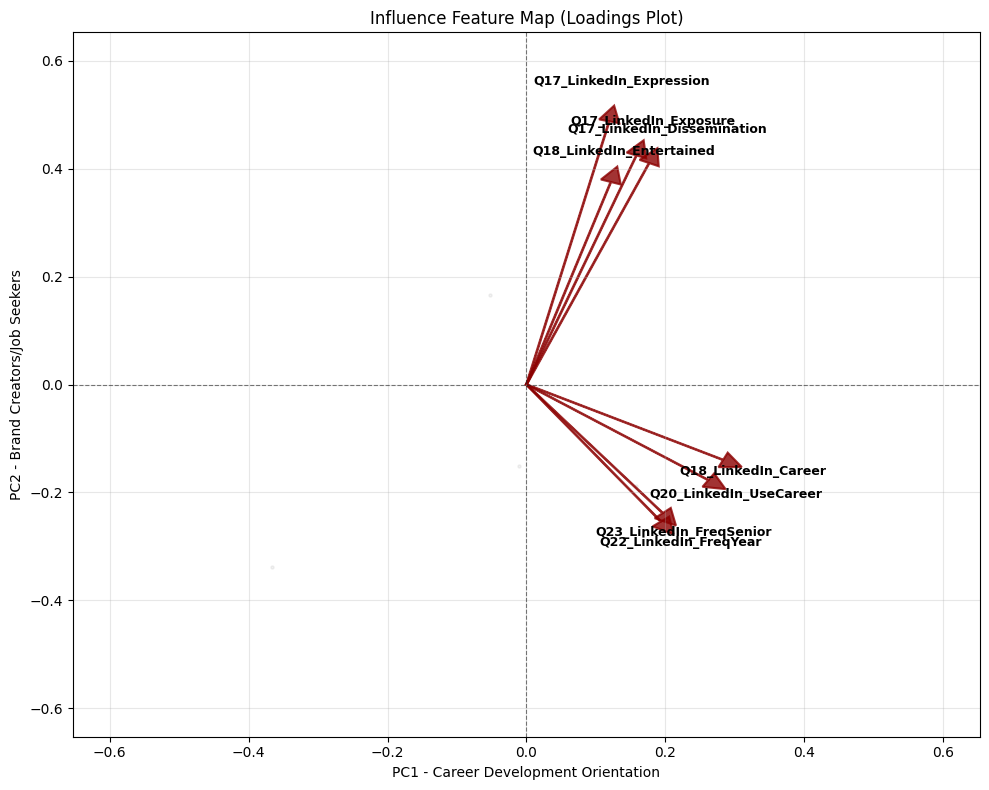

In [49]:
# 1. Plot setup
fig = plt.figure(figsize=(10, 8))

# 2. Optional: Plot very faint points or do not plot them
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1, color='gray', s=5)

# 3. Scale factor for arrows (adjustable)
scale = 1.0

# 4. Draw arrows with an importance filter
# We calculate the magnitude (length) of each vector to identify the most important ones
magnitudes = np.sqrt(loadings.iloc[:, 0]**2 + loadings.iloc[:, 1]**2)

for i, var in enumerate(latent_features):
    # Only show arrows with a relevant magnitude (e.g., > 0.3) to avoid "noise"
    if magnitudes[i] > 0.3:
        x = loadings.iloc[i, 0] * scale
        y = loadings.iloc[i, 1] * scale

        # Draw Arrow
        plt.arrow(0, 0, x, y, color='darkred', alpha=0.8,
                  head_width=0.03, head_length=0.03, linewidth=1.5)

        # Place text with a slight offset to prevent it from overlapping the arrow
        plt.text(x * 1.15, y * 1.15, var, color='black',
                 fontsize=9, fontweight='bold', ha='center', va='center')

# 5. Center the graph at the origin (0,0) and set symmetrical boundaries
# This ensures a clear area of ​​influence
limit = max(magnitudes) * 1.3
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)

# 6. Add quadrant lines (Zero crossings)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xlabel('PC1 - Career Development Orientation')
plt.ylabel('PC2 - Brand Creators/Job Seekers')
plt.title('Influence Feature Map (Loadings Plot)')
plt.grid(alpha=0.3)
plt.tight_layout()
#fig.savefig('Influence feature Map.png', dpi=150, bbox_inches='tight')
plt.show()

After all this process we can conclude:

1. In the first quadrant (PC1+ and PC2+) the behaviors represent "Active Branding." While they contribute to a student's career (PC1+), their main driver is the desire to stand out, share, and project an identity. The social-expressive motivation "outweighs" the purely functional one.

In [50]:
scores_df = pd.DataFrame(
    X_pca[:, :3],
    columns=['PC1', 'PC2', 'PC3'],
    index=df.index
)

df = pd.concat([df, scores_df], axis=1)

In [51]:
scores_df.round(2)

,PC1,PC2,PC3
0,-1.73,0.44,-0.09
1,-0.13,0.94,0.14
2,-1.09,0.70,1.24
3,-0.59,1.17,-0.34
4,-0.05,0.17,-1.49
...,...,...,...
68,-3.96,1.18,-0.75
69,0.35,0.80,-0.86
70,0.24,-1.36,1.20
71,-1.52,3.10,-0.27


# Now let's make the clusters!

firts lets create a matrix for the clusters where each row is a student and each column is a dimension

In [52]:
pc_cols = ['PC1', 'PC2', 'PC3']

pc_df = pd.DataFrame(
    X_pca[:, :3],
    columns=pc_cols,
    index=df.index
)

pc_df.head().round(2)

,PC1,PC2,PC3
0,-1.73,0.44,-0.09
1,-0.13,0.94,0.14
2,-1.09,0.70,1.24
3,-0.59,1.17,-0.34
4,-0.05,0.17,-1.49


***We will use the Elbow Method to see the optimal number of clusters***

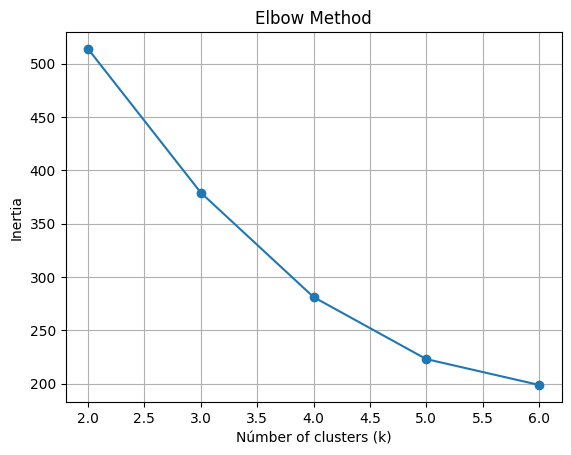

In [53]:
from sklearn.cluster import KMeans

inertia = []

K = range(2, 7)  # with n=69, no more than 5–6 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.xlabel('Númber of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

Since there is no clear number of clusters because the curve does not reach a steady state behavior across the Number of clusters dimension we need to use a more robust method.

# We are going to use the ***Silhouette Score***

In [54]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pc_df)
    score = silhouette_score(pc_df, labels)
    print(f'k={k} → Silhouette score: {score:.3f}')

k=2 → Silhouette score: 0.326
k=3 → Silhouette score: 0.318
k=4 → Silhouette score: 0.353
k=5 → Silhouette score: 0.359


Since the principle for choosing the correct number of clusters is the *k*  with the highest value, the selected one has to make sense to the goal of the project; because of the difference between the scores are not too high, we keep the k = 3, which is a typical value for surveys.

# Now with this in mind, we are going to adjust the K-Means Model

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(pc_df)

In [56]:
df['cluster'].value_counts()

cluster
2 40
0 18
1 11
Name: count, dtype: int64

# It's time to visualize the clusters!

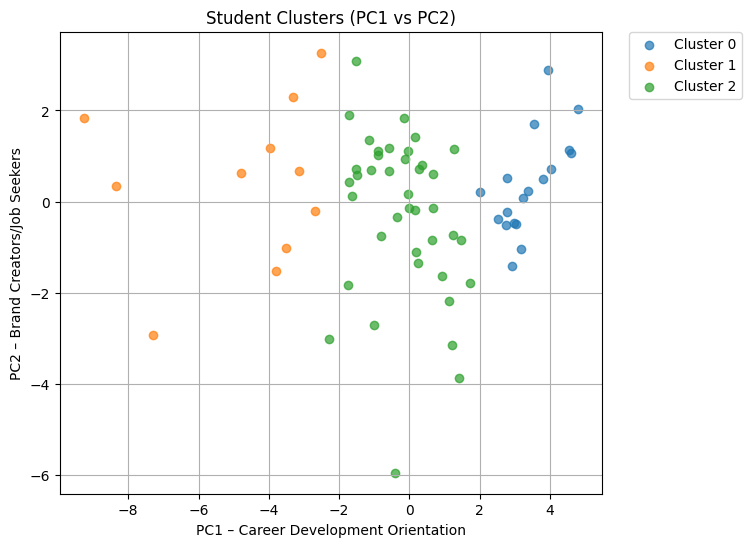

In [57]:
fig = plt.figure(figsize=(7, 6)) 
for c in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == c]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        label=f'Cluster {c}', alpha=0.7
    )

plt.xlabel('PC1 – Career Development Orientation')
plt.ylabel('PC2 – Brand Creators/Job Seekers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Student Clusters (PC1 vs PC2)')
plt.grid()
fig.savefig('Cluster de estudiantes.png', dpi=150, bbox_inches='tight') 
plt.show()

In [58]:
df.groupby('cluster')[pc_cols].mean()

,PC1,PC2,PC3
cluster,,,
0,3.374707,0.361384,-0.005311
1,-4.780702,0.409062,0.353602
2,-0.203925,-0.275115,-0.094850


# clusters_into_profiles

# Naming the clusters!

# Cluster 0

**Numeric profile**

High Positive PC1 → strong profeisonal oriented users

Slightly Positive PC2 → some level of interaccion with the social network

Neutral PC3 → average usage frequency

**Conceptual Interpretation**

Students who use LinkedIn primarily as a professional and career tool, with moderate but not intensive interaction.

**Suggested Name:**
# Career-Oriented Student Users

# Cluster 1

**Numeric profile**

High Negative PC1 → weak profeisonal oriented users

Slightly Positive PC2 → some level of interaccion with the social network

Slightly Positive PC3 → some level of usage frequency

**Conceptual Interpretation**

Students who use LinkedIn interactively and frequently, but without a clear focus on career or employment.

**Suggested Name:**
# Socially Active Explorers

# Cluster 2

**Numeric profile**

Slightly Negativ PC1  → weak profeisonal oriented users

Slightly Negative PC2 → passive interaccion with the social network

Slightly Negative PC3 → low level of usage frequency

**Conceptual Interpretation**

Students with limited, passive, and infrequent use of LinkedIn.

**Suggested Name:**
# Low-Engagement Passive Users

It would be nice to see to what level/frequency each cluster does things according to the questions made

In [59]:
df.groupby('cluster')[latent_features].mean().T.round(2)

cluster,0,1,2
Q17_LinkedIn_Instructors,4.50,3.18,3.82
Q17_LinkedIn_Classmates,4.50,3.27,3.92
Q17_LinkedIn_Career,5.00,3.73,4.60
Q17_LinkedIn_Exposure,4.39,3.45,3.92
Q17_LinkedIn_Expression,4.11,3.18,3.45
Q17_LinkedIn_Dissemination,4.50,3.45,3.68
Q18_LinkedIn_Interact,4.83,3.55,4.40
Q18_LinkedIn_Entertained,3.50,2.45,2.85
Q18_LinkedIn_Informed,4.50,3.45,3.98
Q18_LinkedIn_Career,5.00,3.64,4.58


In [60]:
# Rate of students by cluster
df.groupby('cluster').mean()

# Academic Area
df.groupby('cluster')[[
    'is_business',
    'is_arts & sciences',
    'is_health professions'
]].mean().round(2)

,is_business,is_arts & sciences,is_health professions
cluster,,,
0,0.61,0.17,0.22
1,0.27,0.45,0.27
2,0.38,0.28,0.32


The distribution of academic areas across clusters revealed meaningful differences. The career-oriented cluster was predominantly composed of business students, whereas the exploratory cluster showed a higher proportion of arts and sciences students. In contrast, the passive professional cluster displayed a more balanced academic composition, suggesting that passive recognition of LinkedIn’s professional value transcends disciplinary boundaries

# **Finally Let's Convert Each Cluster Into Persons (Student)**

🧠 Student 1 – “Strategic Career Builder”

📍 Cluster 0

***General Profile***

A student who uses LinkedIn intentionally, strategically, and professionally, integrating the platform into their career planning, networking, and professional identity development.

According to the results:

High scores in:

Profesional and Career Usage (Q20_* ≈ 4.8–5.0)

Active interaction and profesional value (Q18_* ≈ 4.5–5.0)

Connecting with teachers, industry, and peers (Q17_* ≈ 4.1–5.0)

Moderate-high frequency of use

61% business students

Higher proportion of seniors students

***Motivations***

Building professional capital

Strategic networking

Preparation for job placement

***Representative phrase***

“I use LinkedIn as a key tool to build my career.”

***Practical implications***

High receptiveness to:

Mentoring

Recruitment events

Employer branding content

Ideal for university employability programs

🌱 Student 2 – “Exploratory Observer”

📍 Cluster 1

***General Profile***

Students with low professional engagement on LinkedIn. Their use is sporadic, exploratory, and poorly integrated with academic or career goals.

According to the results:

Lower scores across all professional dimensions (≈ 2.5–3.6)

Less frequent use

Predominance of arts & sciences students

Lower presence of seniors

***Motivations***

General curiosity

Passive observation of the professional environment

Lack of career clarity

***Representative Phrase***

“I know LinkedIn exists, but I don’t use it much, and I don’t really know what for.”

***Practical Implications***

They need:

Digital professional literacy

Clear examples of usefulness

Guided curriculum integration

They do not respond well to highly professional messages without context

👀 Student 3 – “Passive Professional”

📍 Cluster 2

General Profile

Students who recognize the professional value of LinkedIn but maintain a primarily passive use, focused on consuming information rather than interacting or networking.

According to the results:

Medium-high scores in professional value (≈ 4.0–4.6)

Lower active interaction (Q18_LinkedIn_Interact ≈ 4.4, but lower than cluster 0)

Moderate frequency of use

Balanced academic distribution

***Motivations***

Staying informed

Monitoring opportunities

Preparing for the future

***Representative Phrase***

“LinkedIn is important, although I don’t use it actively yet.”

***Practical Implications***

High activation potential:

Practical workshops

Incentives for interaction (posts, comments)

Relevant success stories

Ideal profile for transition interventions